# Bibliotecas

Primeiro, vamos importar as bibliotecas necessárias e renomeá-las para facilitar o uso em nosso código. A seguir, temos uma breve descrição de cada biblioteca:

- **NumPy** (renomeada como `np`): Biblioteca que fornece suporte para arrays multidimensionais e funções matemáticas eficientes para manipulação de grandes conjuntos de dados numéricos.
- **Matplotlib** (renomeada como `plt`): Biblioteca utilizada para a criação de gráficos e visualizações de dados. Ela oferece uma ampla gama de opções para gerar gráficos 2D, como linhas, barras, dispersões, histogramas, entre outros.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Atividade mínima

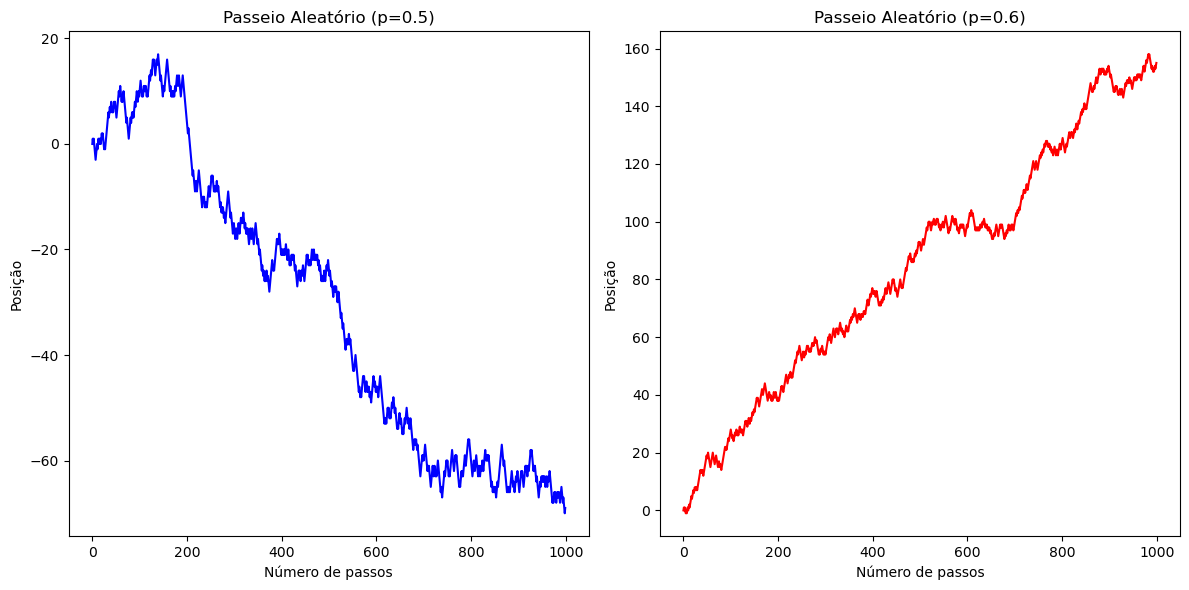

In [4]:
def passeio_aleatorio(N, p):
    """
    Realiza um passeio aleatório de N passos, onde em cada passo o caminhante pode se mover
    para frente (+1) ou para trás (-1) com uma probabilidade p.

    Parâmetros:
    N (int): O número de passos do passeio aleatório.
    p (float): A probabilidade de o caminhante dar um passo para frente (+1).
    rng (np.random.Generator): Um gerador de números aleatórios (como o `np.random.Generator`) 
                                para garantir a geração de números aleatórios de maneira controlada.

    Retorna:
    np.ndarray: Um array de tamanho N, contendo as posições do passeio aleatório ao longo do tempo.
                A posição inicial é 0, e as subsequentes são determinadas pela soma cumulativa dos passos.
    """
    posicoes = np.zeros(N)  # Inicializa o array para armazenar as posições
    # Gera os passos (-1 ou +1) com base na probabilidade p
    passos = rng.choice([1, -1], size=N-1, p=[p, 1-p])
    posicoes[1:] = np.cumsum(passos)  # Atualiza as posições com a soma cumulativa dos passos
    return posicoes

# Parâmetros
N = 1000  # Número de passos
p_values = [0.5, 0.6]  # Probabilidades p

# Criar o gerador de números aleatórios
rng = np.random.default_rng()

# Gráficos
plt.figure(figsize=(12, 6))

# Passeio para p = 0.5
plt.subplot(1, 2, 1)
posicoes_p_0_5 = passeio_aleatorio(N, p=0.5)
plt.plot(posicoes_p_0_5, color='blue')
plt.title("Passeio Aleatório (p=0.5)")
plt.xlabel("Número de passos")
plt.ylabel("Posição")

# Passeio para p = 0.6
plt.subplot(1, 2, 2)
posicoes_p_0_6 = passeio_aleatorio(N, p=0.6)
plt.plot(posicoes_p_0_6, color='red')
plt.title("Passeio Aleatório (p=0.6)")
plt.xlabel("Número de passos")
plt.ylabel("Posição")

# Exibir gráfico
plt.tight_layout()
plt.show()

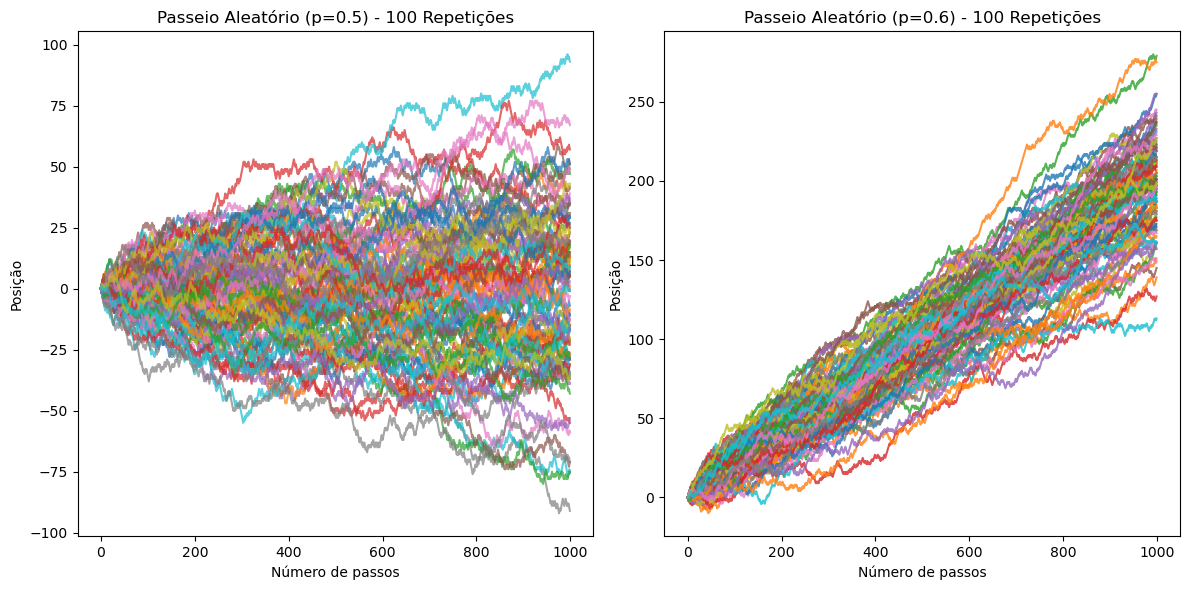

In [6]:
repeticoes = 100  # Número de repetições

# Gráficos
plt.figure(figsize=(12, 6))

# Passeio para p = 0.5
plt.subplot(1, 2, 1)
for _ in range(repeticoes):  # Repetição 100 vezes
    posicoes = passeio_aleatorio(N, p=0.5)
    plt.plot(posicoes,  alpha=0.7)  # Linhas com transparência
plt.title("Passeio Aleatório (p=0.5) - 100 Repetições")
plt.xlabel("Número de passos")
plt.ylabel("Posição")

# Passeio para p = 0.6
plt.subplot(1, 2, 2)
for _ in range(repeticoes):  # Repetição 100 vezes
    posicoes = passeio_aleatorio(N, p=0.6)
    plt.plot(posicoes, alpha=0.8)  # Linhas com transparência
plt.title("Passeio Aleatório (p=0.6) - 100 Repetições")
plt.xlabel("Número de passos")
plt.ylabel("Posição")

# Exibir gráfico
plt.tight_layout()
plt.show()

# Atividades intermediárias

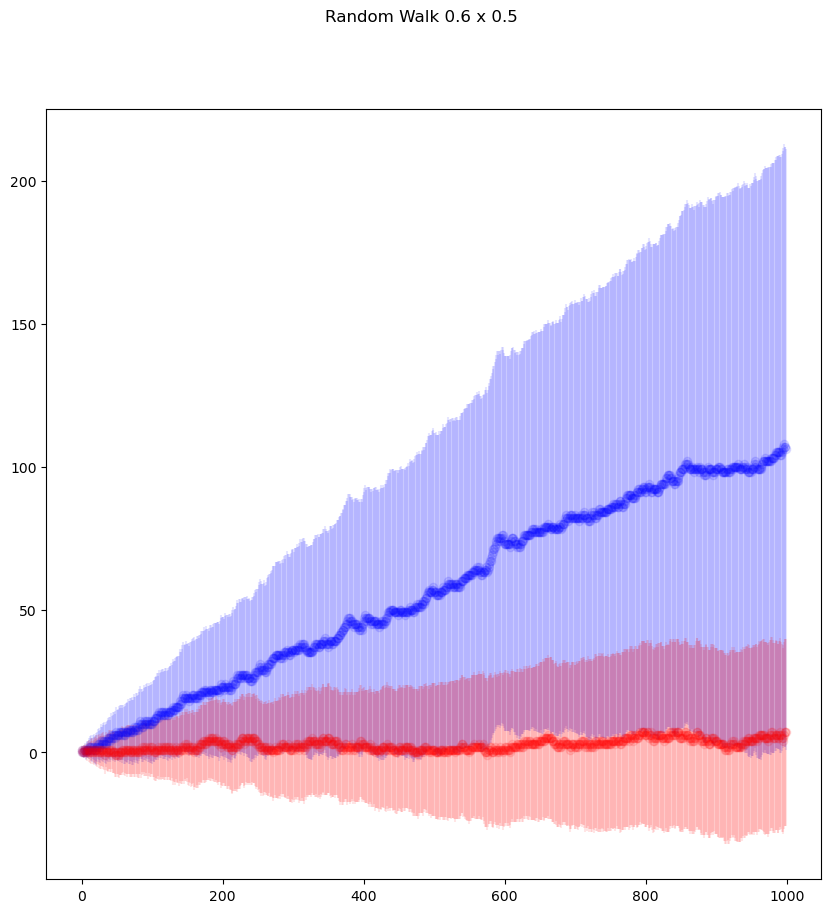

In [7]:
def desvio(X):

    m = len(X)
    x = np.median(X ,axis=0)
    deltax = []
    for i in range(m):
        deltax.append((x-X[i])**2)
    desvio = (np.sum(deltax,axis=0)/(m-1))**(1/2)

    return desvio ,x

Y1 = Y2 = []
X1 = X2 = []
for i in range(100):
    y2 = passeio_aleatorio(N=1000,p=0.5)
    X2 = np.arange(len(y2))
    Y2.append(y2)

desvioy2 , y2 = desvio(Y2)


for i in range(100):
    y1 = passeio_aleatorio(1000,0.6)
    X1 = np.arange(len(y1))
    Y1.append(y1)

desvioy1 , y1 = desvio(Y1)


fig1 , ax1 = plt.subplots(figsize=(10,10))

ax1.errorbar(x=X1,y=y1,yerr=desvioy1,xerr=0,alpha=0.1,fmt='o',color ='Blue')

ax1.errorbar(x=X2,y=y2,yerr=desvioy2,xerr=0,alpha=0.1,fmt='o',color ='Red')
plt.suptitle('Random Walk 0.6 x 0.5')
plt.show()

Text(0.5, 1.0, 'histograma')

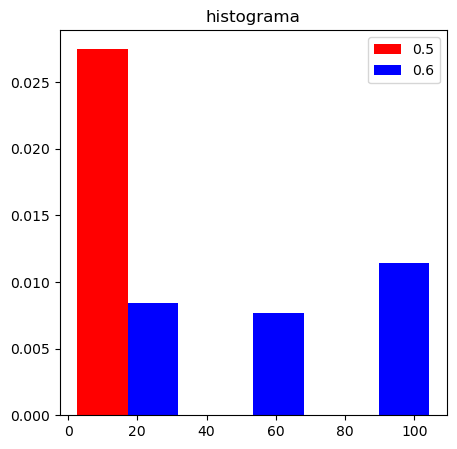

In [8]:
fig3 , ax3 = plt.subplots(figsize=(5,5))

x= [y2,y1]
colors = ['red', 'blue']
labels = ['0.5', '0.6']
n_bins = 3
ax3.hist(x, n_bins, density=True, histtype='bar', color=colors, label=labels)
ax3.legend(prop={'size': 10})
ax3.set_title('histograma')

# Atividade avançada

In [ ]:
import plotly.graph_objects as go
import numpy as np
Z1= []
for i in range(100):
    z1= passeio_aleatorio(1000,0.6)
    Z1.append(z1)


#fig2 = go.Figure(data=go.Scatter(x=x3, y=z1, mode='markers', name='markers'))
fig = go.Figure(data=[go.Surface(z=Z1)])

# Update layout for better visualization
fig.update_layout(
    title="3D Histogram of Random Walks",
    scene=dict(
        xaxis_title="Step Index",
        yaxis_title="Walk Index",
        zaxis_title="Value"
    )
)

fig.show()